In [31]:
#IMPORTAR LIBRERÍAS
#Advertencias
import warnings
warnings.filterwarnings('ignore')

#Tratamiento de datos
import numpy as np
import pandas as pd
import statsmodels.api as sm 

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#Preparación de datos
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn import set_config

#Modelado y pronóstico
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

#Búsqueda hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Evaluación
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [32]:
#IMPORTAR DATOS
datos = pd.read_csv(r'C:\Users\maria\Downloads\punto2.csv')

In [33]:
datos.head()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,...,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,...,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,...,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,...,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,...,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616


In [34]:
datos.tail()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
24995,29995,3,0,0,Salried,4,225 to 250,5614,22,0,...,smokes,2000.0,Kanpur,79,Y,Rare,Moderate,4,40,39488
24996,29996,6,0,0,Business,4,200 to 225,4719,58,0,...,never smoked,2009.0,Kanpur,66,N,Rare,Moderate,2,28,14808
24997,29997,7,0,1,Student,2,150 to 175,5624,34,0,...,Unknown,NaN,Bhubaneswar,76,N,Rare,Moderate,1,35,33318
24998,29998,1,0,0,Salried,2,225 to 250,10777,27,0,...,Unknown,NaN,Surat,74,N,Rare,Moderate,0,40,30850
24999,29999,8,2,0,Business,4,150 to 175,5882,22,1,...,formerly smoked,2014.0,Chennai,57,N,No,No,4,21,6170


In [35]:
#EXPLORACIÓN DE DATOS
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [36]:
#Imputar datos nulos con la moda
modaBMI = datos['bmi'].mode()
modaYearLast = datos['Year_last_admitted'].mode()

In [37]:
datos['bmi'].fillna(modaBMI[0], inplace = True)
datos['Year_last_admitted'].fillna(modaYearLast[0], inplace = True)

In [38]:
#EXPLORACIÓN DE DATOS
datos.describe()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,visited_doctor_last_1_year,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,Year_last_admitted,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,17499.500000,4.089040,0.773680,0.081720,3.104200,5215.889320,44.918320,0.054640,0.098160,167.530000,31.326272,2006.794880,71.610480,2.517960,28.812280,27147.407680
std,7217.022701,2.606612,1.199449,0.273943,1.141663,1053.179748,16.107492,0.227281,0.297537,62.729712,7.726058,6.282164,9.325183,1.690335,8.632382,14323.691832
min,5000.000000,0.000000,0.000000,0.000000,0.000000,2034.000000,16.000000,0.000000,0.000000,57.000000,12.300000,1990.000000,52.000000,0.000000,11.000000,2468.000000
25%,11249.750000,2.000000,0.000000,0.000000,2.000000,4543.000000,31.000000,0.000000,0.000000,113.000000,26.300000,2003.000000,64.000000,1.000000,21.000000,16042.000000
50%,17499.500000,4.000000,0.000000,0.000000,3.000000,5089.000000,45.000000,0.000000,0.000000,168.000000,30.200000,2010.000000,72.000000,3.000000,31.000000,27148.000000
75%,23749.250000,6.000000,1.000000,0.000000,4.000000,5730.000000,59.000000,0.000000,0.000000,222.000000,35.300000,2010.000000,78.000000,4.000000,36.000000,37020.000000
max,29999.000000,8.000000,5.000000,1.000000,12.000000,11255.000000,74.000000,1.000000,1.000000,277.000000,100.600000,2018.000000,96.000000,6.000000,42.000000,67870.000000


In [39]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [40]:
#Preparación de datos
x = datos.drop('insurance_cost', axis = 1)
y = datos['insurance_cost']

In [41]:
numCols = x.select_dtypes(include = ['float64', 'int64']).columns.to_list()
matCols = x[['Occupation', 'cholesterol_level', 'Gender', 'smoking_status', 'covered_by_any_other_company', 'Alcohol', 'exercise']].columns.to_list()
ordCols = x[['Location']].columns.to_list()

In [42]:
numCols

['applicant_id',
 'years_of_insurance_with_us',
 'regular_checkup_lasy_year',
 'adventure_sports',
 'visited_doctor_last_1_year',
 'daily_avg_steps',
 'age',
 'heart_decs_history',
 'other_major_decs_history',
 'avg_glucose_level',
 'bmi',
 'Year_last_admitted',
 'weight',
 'weight_change_in_last_one_year',
 'fat_percentage']

In [43]:
matCols

['Occupation',
 'cholesterol_level',
 'Gender',
 'smoking_status',
 'covered_by_any_other_company',
 'Alcohol',
 'exercise']

In [44]:
ordCols

['Location']

In [45]:
numTransformer = Pipeline(steps = [('scaler', MinMaxScaler())])
matTransformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])
ordTransformer = Pipeline(steps = [('ordinal', OrdinalEncoder(handle_unknown = 'error'))])

In [46]:
preprocesador = ColumnTransformer(transformers = [
    ('numeric', numTransformer, numCols),
    ('catOhe', matTransformer, matCols),
    ('catOrd', ordTransformer, ordCols)
], remainder = 'passthrough')

set_config(display = 'diagram')
preprocesador

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['applicant_id', 'years_of_insurance_with_us',
                                  'regular_checkup_lasy_year',
                                  'adventure_sports',
                                  'visited_doctor_last_1_year',
                                  'daily_avg_steps', 'age',
                                  'heart_decs_history',
                                  'other_major_decs_history',
                                  'avg_glucose_level', 'bmi',
                                  'Year_last_admitted', 'weight',
                                  'weight_change_in_last_one_year',
                                  'fat_percentage']),
                                ('catOhe',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Occupation', 'cholesterol_level', 'Gender',
                                  'smoking_status',
                                  'covered_by_any_other_company', 'Alcohol',
                                  'exercise']),
                                ('catOrd',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Location'])])

In [47]:
xpre = preprocesador.fit_transform(x)
xpre

array([[0.00000000e+00, 3.75000000e-01, 2.00000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 3.00000000e+00],
       [4.00016001e-05, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 6.00000000e+00],
       [8.00032001e-05, 1.25000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.00000000e+00],
       ...,
       [9.99919997e-01, 8.75000000e-01, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [9.99959998e-01, 1.25000000e-01, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.40000000e+01],
       [1.00000000e+00, 1.00000000e+00, 4.00000000e-01, ...,
        0.00000000e+00, 1.00000000e+00, 3.00000000e+00]])

In [48]:
codCat = preprocesador.named_transformers_['catOhe']['onehot'].get_feature_names(matCols)
codCat

array(['Occupation_Business', 'Occupation_Salried', 'Occupation_Student',
       'cholesterol_level_125 to 150', 'cholesterol_level_150 to 175',
       'cholesterol_level_175 to 200', 'cholesterol_level_200 to 225',
       'cholesterol_level_225 to 250', 'Gender_Female', 'Gender_Male',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'covered_by_any_other_company_N', 'covered_by_any_other_company_Y',
       'Alcohol_Daily', 'Alcohol_No', 'Alcohol_Rare', 'exercise_Extreme',
       'exercise_Moderate', 'exercise_No'], dtype=object)

In [49]:
labels = np.concatenate([numCols, codCat, ordCols])
labels

array(['applicant_id', 'years_of_insurance_with_us',
       'regular_checkup_lasy_year', 'adventure_sports',
       'visited_doctor_last_1_year', 'daily_avg_steps', 'age',
       'heart_decs_history', 'other_major_decs_history',
       'avg_glucose_level', 'bmi', 'Year_last_admitted', 'weight',
       'weight_change_in_last_one_year', 'fat_percentage',
       'Occupation_Business', 'Occupation_Salried', 'Occupation_Student',
       'cholesterol_level_125 to 150', 'cholesterol_level_150 to 175',
       'cholesterol_level_175 to 200', 'cholesterol_level_200 to 225',
       'cholesterol_level_225 to 250', 'Gender_Female', 'Gender_Male',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'covered_by_any_other_company_N', 'covered_by_any_other_company_Y',
       'Alcohol_Daily', 'Alcohol_No', 'Alcohol_Rare', 'exercise_Extreme',
       'exercise_Moderate', 'exercise_No', 'Location'], dtype=object)

In [50]:
xpro = pd.DataFrame(xpre, columns = labels)
xpro.head()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,visited_doctor_last_1_year,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,...,smoking_status_smokes,covered_by_any_other_company_N,covered_by_any_other_company_Y,Alcohol_Daily,Alcohol_No,Alcohol_Rare,exercise_Extreme,exercise_Moderate,exercise_No,Location
0,0.00000,0.375,0.2,1.0,0.166667,0.307125,0.206897,1.0,0.0,0.181818,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0
1,0.00004,0.000,0.0,0.0,0.333333,0.474677,0.586207,0.0,0.0,0.704545,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,6.0
2,0.00008,0.125,0.0,0.0,0.333333,0.268409,0.896552,0.0,0.0,0.495455,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0
3,0.00012,0.875,0.8,0.0,0.166667,0.453313,0.603448,0.0,0.0,0.236364,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0
4,0.00016,0.375,0.2,0.0,0.166667,0.314933,0.482759,0.0,1.0,0.277273,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [51]:
xpro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  float64
 1   years_of_insurance_with_us      25000 non-null  float64
 2   regular_checkup_lasy_year       25000 non-null  float64
 3   adventure_sports                25000 non-null  float64
 4   visited_doctor_last_1_year      25000 non-null  float64
 5   daily_avg_steps                 25000 non-null  float64
 6   age                             25000 non-null  float64
 7   heart_decs_history              25000 non-null  float64
 8   other_major_decs_history        25000 non-null  float64
 9   avg_glucose_level               25000 non-null  float64
 10  bmi                             25000 non-null  float64
 11  Year_last_admitted              25000 non-null  float64
 12  weight                          

In [52]:
xEntrenamiento, xPrueba, yEntrenamiento, yPrueba = train_test_split(x, y, train_size = 0.7, random_state = 123)

In [57]:
#Modelo Árbol de Decisión
modelo1 = DecisionTreeRegressor()
modelo1.fit(xEntrenamiento, yEntrenamiento)

ValueError: could not convert string to float: 'Student'

AttributeError: 'DecisionTreeRegressor' object has no attribute 'tree_'

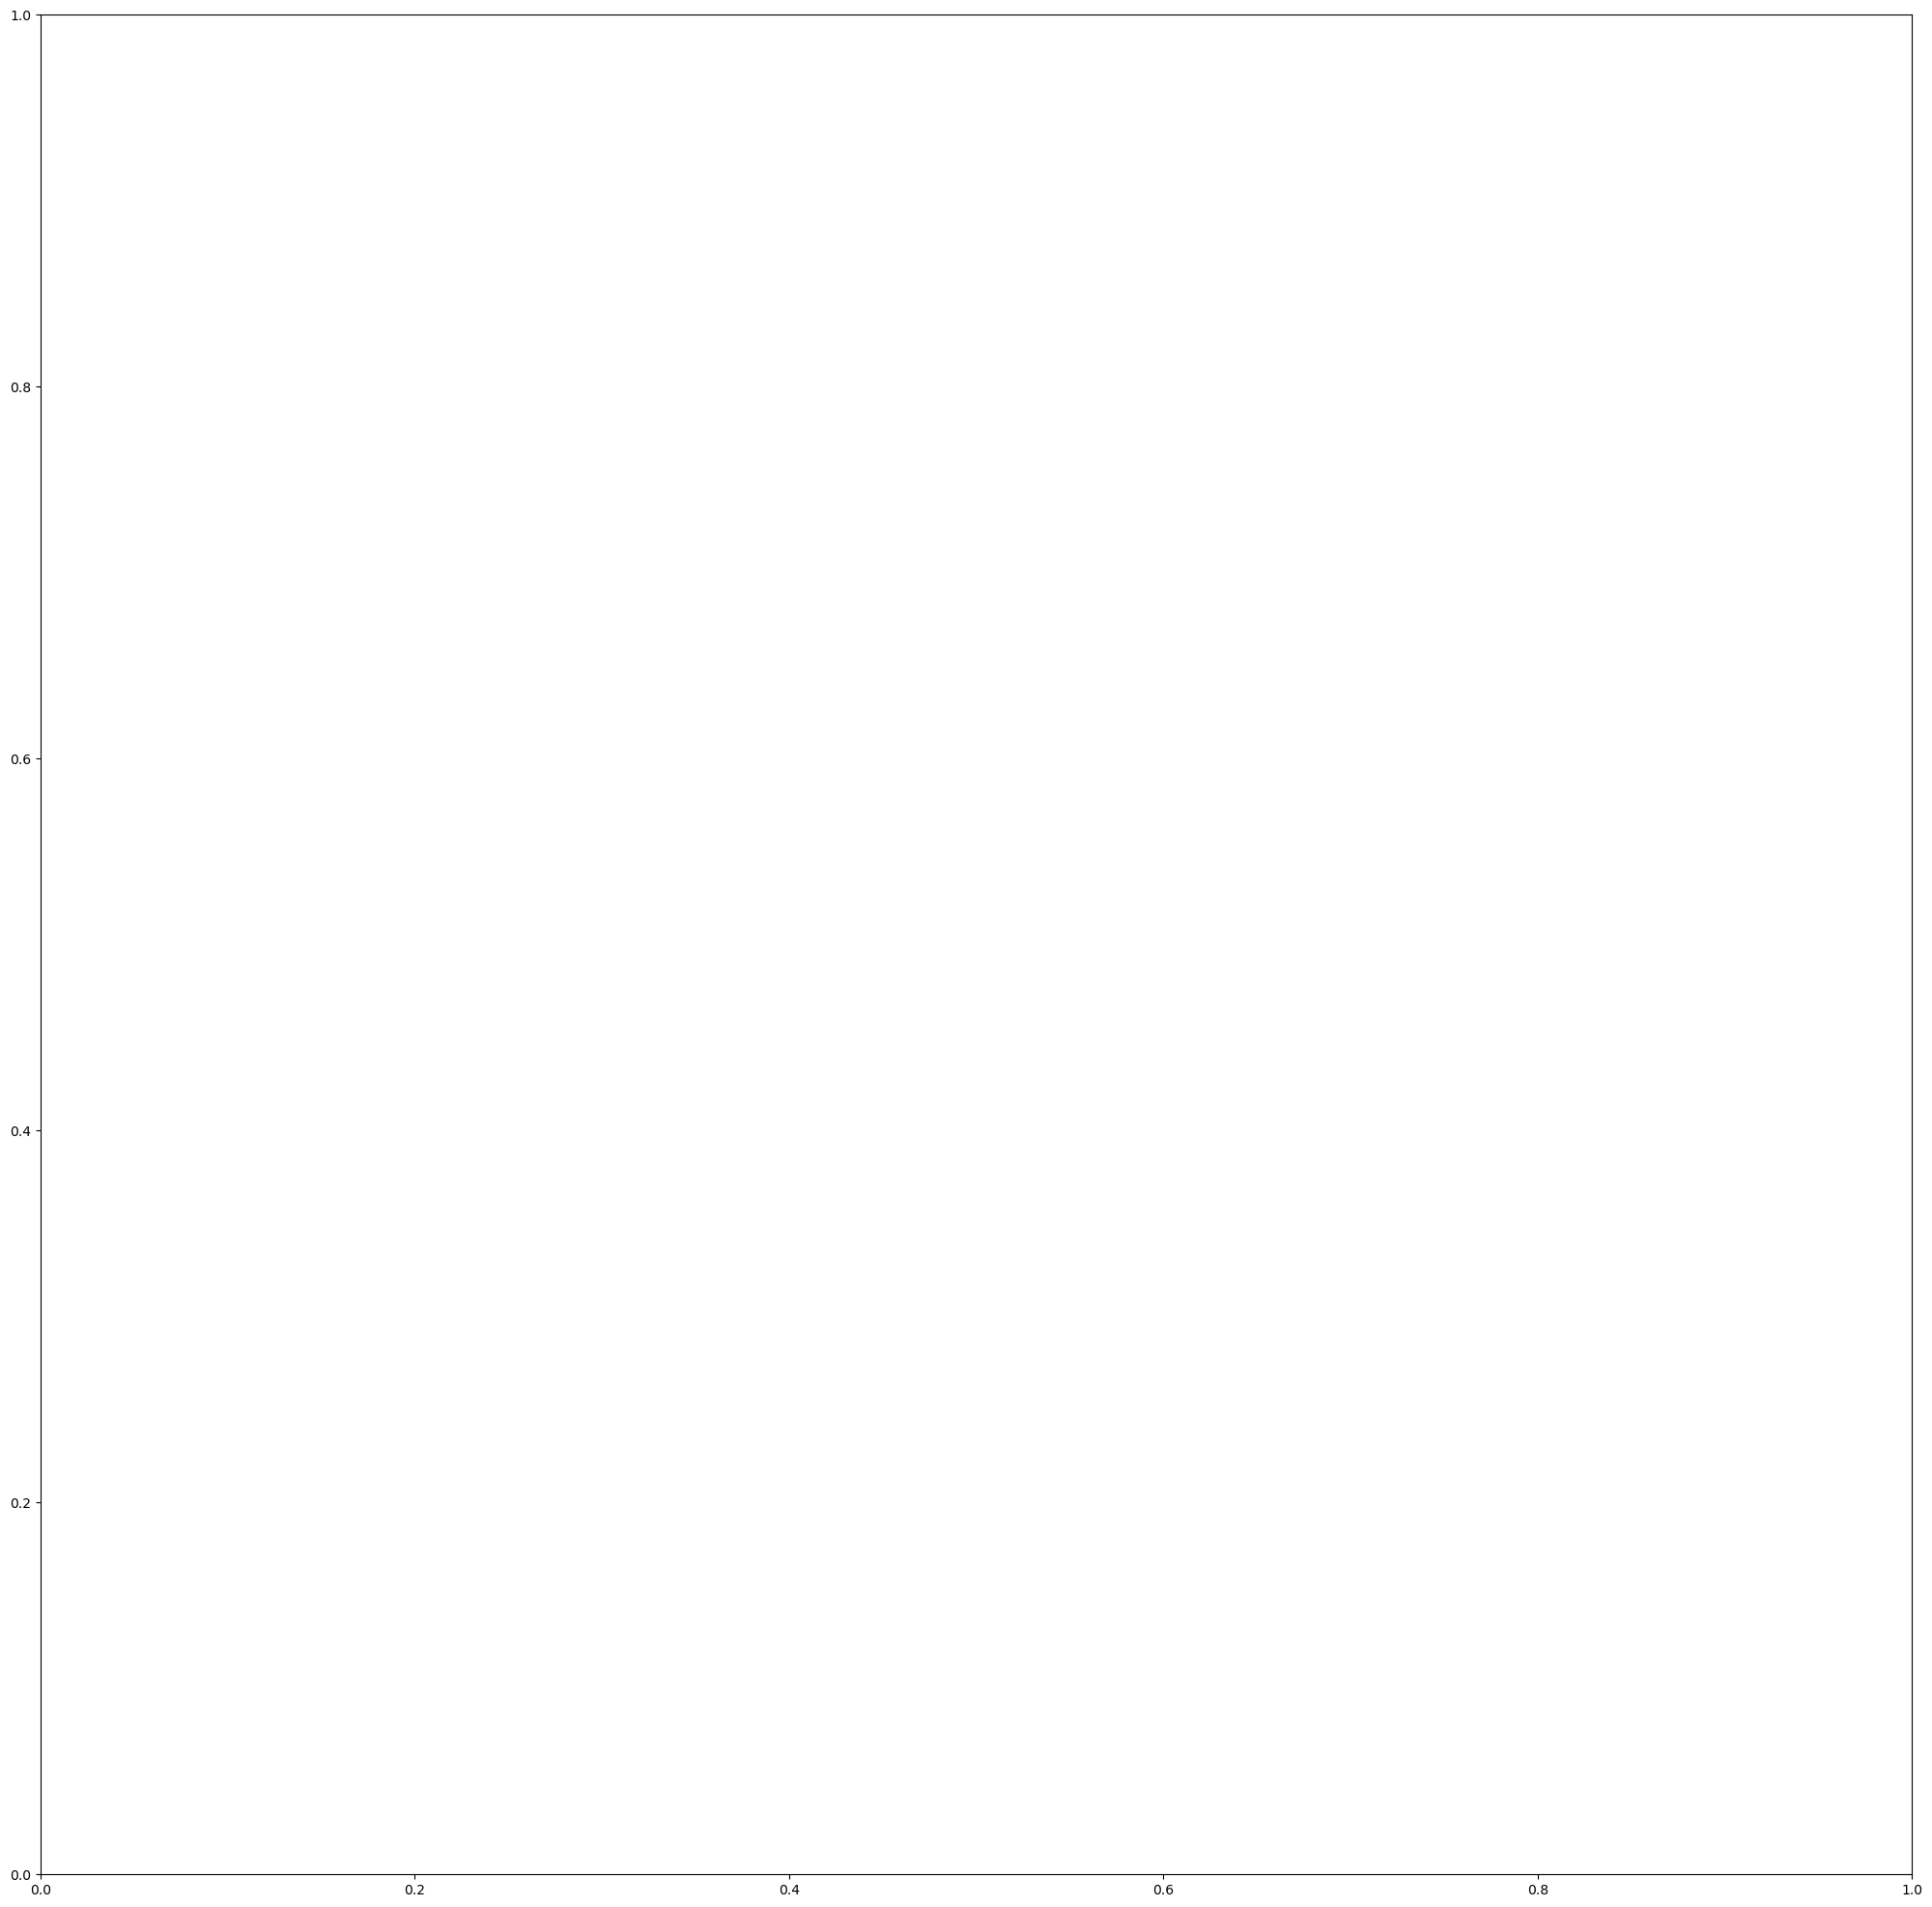

In [56]:
fig, ax = plt.subplots(figsize = (25, 25))
print(f'Profundidad del árbol: {modelo1.get_depth()}')
print(f'Número de hojas: {modelo1.get_n_leaves()}')
plot = plot_tree(decision_tree = modelo1,
                feature_names = xEntrenamiento.columns.to_list(),
                filled = True,
                fontsize = 14, ax = ax)
plt.show()

In [58]:
#Métricas de desempeño
pred1Entrenamiento = modelo1.predict(xEntrenamiento)
pred1Prueba = modelo1.predict(xPrueba)

r21Entrenamiento = r2_score(yEntrenamiento, pred1Entrenamiento)
rmse1Entrenamiento = mean_squared_error(yEntrenamiento, pred1Entrenamiento, squared = False)
mae1Entrenamiento = mean_absolute_error(yEntrenamiento, pred1Entrenamiento)
mape1Entrenamiento = mean_absolute_percentage_error(yEntrenamiento, pred1Entrenamiento)
print(f'Las métricas de Entrenamiento para el árbol de decisión son: \nR2: {r21Entrenamiento}' + f'\nRMSE: {rmse1Entrenamiento}\nMAE: {mae1Entrenamiento}\nMAPE: {mape1Entrenamiento}')

ValueError: could not convert string to float: 'Student'

In [ ]:
r21Prueba = r2_score(yPrueba, pred1Prueba)
rmse1Prueba = mean_squared_error(yPrueba, pred1Prueba, squared = False)
mae1Prueba = mean_absolute_error(yPrueba, pred1Prueba)
mape1Prueba = mean_absolute_percentage_error(yPrueba, pred1Prueba)
print(f'Las métricas de Prueba para el árbol de decisión son: \nR2: {r21Prueba}' + f'\nRMSE: {rmse1Prueba}\nMAE: {mae1Prueba}\nMAPE: {mape1Prueba}')